# Neural Network Training: Implementing Backpropagation and Model Optimization


In [1]:
import numpy as np
from parameters import *
from utils import data
from model import NeuralNetwork
import matplotlib.pyplot as plt


The goal of this project is to create a neural network with 3 layers: input - hidden - output. Both the input layer and the output layer will have 8 nodes, the hidden layer only 3 nodes(+ biases).

The learning examples will each have 7 zeros and 1 one in them(so there will be only 8 different learning examples, and you will have to repeat the,) and the ouput the network should learn is exactly the same as the input.  So when the input layer is given < 0,0,0,1,0,0,0,0 > as input, the output to aim for is also < 0,0,0,1,0,0,0,0 >.

We train the neural network using **Gradient Descent**.

We want our network to learn this reproducing function on the 8different learning examples. 

In [2]:
# create data
data = data()

# create neural network
nn = NeuralNetwork()
nn.init_weights()

Now is time to train the neural network. You can modify the training parameters in the file "parameters.py" file. 

You have 4 different parameters: 
- **LAYERS**: The list in which the lenght corresponds to the number of layers whether the elements correspond to the number of nodes por layer. 
- **BATCH_SIZE**: Refers to the number of training examples utilized in one iteration of model training. 
- **LAMBDA**: The **regularization term**. Regularization helps the network maintaining the weights in a reasonable range, avoiding them to become too high or too low. 
- **ALPHA**: The **learning rate** is a hyperparameter that determines the size of the steps taken towards the minimum of the loss function during training. A too-high learning rate can lead to overshoot the minimum, while a too-low rate can result in slow convergence or getting stuck in local minima.
- **EPOCHS**: Number of complete passes through the entire training dataset. 



In [3]:
nn.train(data)

Epoch 1/1000, Loss: 0.6277771623593321
Epoch 2/1000, Loss: 0.6277319210569311
Epoch 3/1000, Loss: 0.6276414233991408
Epoch 4/1000, Loss: 0.627505633557461
Epoch 5/1000, Loss: 0.6273244978231676
Epoch 6/1000, Loss: 0.6270979446479544
Epoch 7/1000, Loss: 0.6268258846985859
Epoch 8/1000, Loss: 0.6265082109259559
Epoch 9/1000, Loss: 0.6261447986490476
Epoch 10/1000, Loss: 0.6257355056543941
Epoch 11/1000, Loss: 0.6252801723117313
Epoch 12/1000, Loss: 0.6247786217066432
Epoch 13/1000, Loss: 0.6242306597910942
Epoch 14/1000, Loss: 0.6236360755528474
Epoch 15/1000, Loss: 0.6229946412048666
Epoch 16/1000, Loss: 0.6223061123959008
Epoch 17/1000, Loss: 0.6215702284435507
Epoch 18/1000, Loss: 0.6207867125912154
Epoch 19/1000, Loss: 0.6199552722904198
Epoch 20/1000, Loss: 0.6190755995101128
Epoch 21/1000, Loss: 0.6181473710746364
Epoch 22/1000, Loss: 0.6171702490321433
Epoch 23/1000, Loss: 0.6161438810553476
Epoch 24/1000, Loss: 0.6150679008765696
Epoch 25/1000, Loss: 0.6139419287591311
Epoch 26/1

In [4]:
tolerance = 0.0001
cons_epochs = 5

count_stable = 0
epoch_stabilized = -1
for i in range(1, len(nn.average_losses)):
    if abs(nn.average_losses[i] - nn.average_losses[i-1]) < tolerance:
        count_stable += 1
    else:
        count_stable = 0
    
    if count_stable >= cons_epochs:
        epoch_stabilized = i  
        break

if epoch_stabilized != -1:
    print(f"The training stabilized at epoch {epoch_stabilized + 1} with average loss: {nn.average_losses[epoch_stabilized]}")
else:
    print("The training did not stabilize.")

The training stabilized at epoch 193 with average loss: 0.11452951678651199


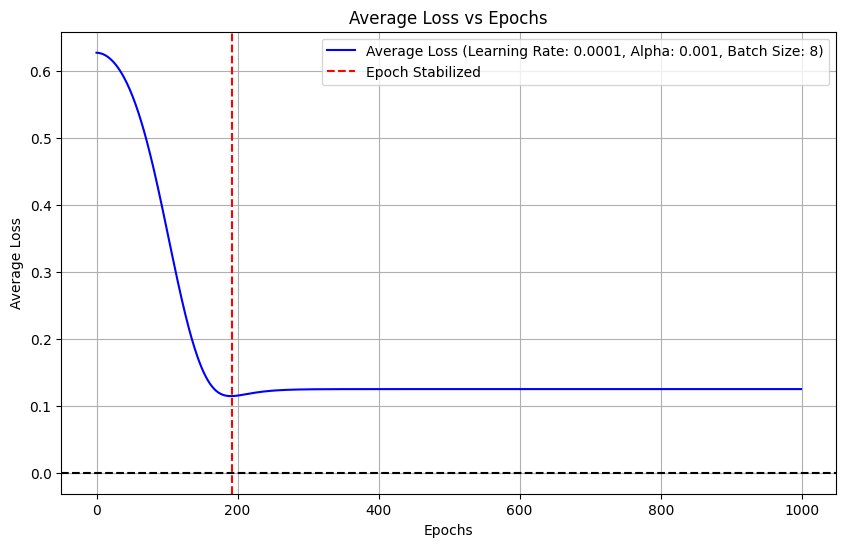

In [5]:
#plot the loss
losses = nn.average_losses

plt.figure(figsize=(10, 6))
plt.plot(
    losses, label=f"Average Loss (Learning Rate: {LAMBDA}, Alpha: {ALPHA}, Batch Size: {BATCH_SIZE})", color="blue"
)
plt.title("Average Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.legend()
plt.grid()
plt.axhline(y=0, color="black", linestyle="--")

if epoch_stabilized != -1:  
    plt.axvline(x=epoch_stabilized, color='red', linestyle='--', label='Epoch Stabilized')

plt.legend()
plt.show()
plt.show()

Epoch 1/1000, Loss: 0.6334304323095348
Epoch 2/1000, Loss: 0.6334263548536645
Epoch 3/1000, Loss: 0.6334181997988616
Epoch 4/1000, Loss: 0.6334059668028046
Epoch 5/1000, Loss: 0.6333896553520182
Epoch 6/1000, Loss: 0.6333692647618816
Epoch 7/1000, Loss: 0.63334479417664
Epoch 8/1000, Loss: 0.6333162425694179
Epoch 9/1000, Loss: 0.6332836087422353
Epoch 10/1000, Loss: 0.6332468913260285
Epoch 11/1000, Loss: 0.6332060887806713
Epoch 12/1000, Loss: 0.6331611993950009
Epoch 13/1000, Loss: 0.6331122212868465
Epoch 14/1000, Loss: 0.6330591524030599
Epoch 15/1000, Loss: 0.6330019905195508
Epoch 16/1000, Loss: 0.6329407332413242
Epoch 17/1000, Loss: 0.6328753780025221
Epoch 18/1000, Loss: 0.6328059220664677
Epoch 19/1000, Loss: 0.6327323625257124
Epoch 20/1000, Loss: 0.6326546963020894
Epoch 21/1000, Loss: 0.6325729201467666
Epoch 22/1000, Loss: 0.632487030640308
Epoch 23/1000, Loss: 0.6323970241927346
Epoch 24/1000, Loss: 0.6323028970435923
Epoch 25/1000, Loss: 0.632204645262024
Epoch 26/1000

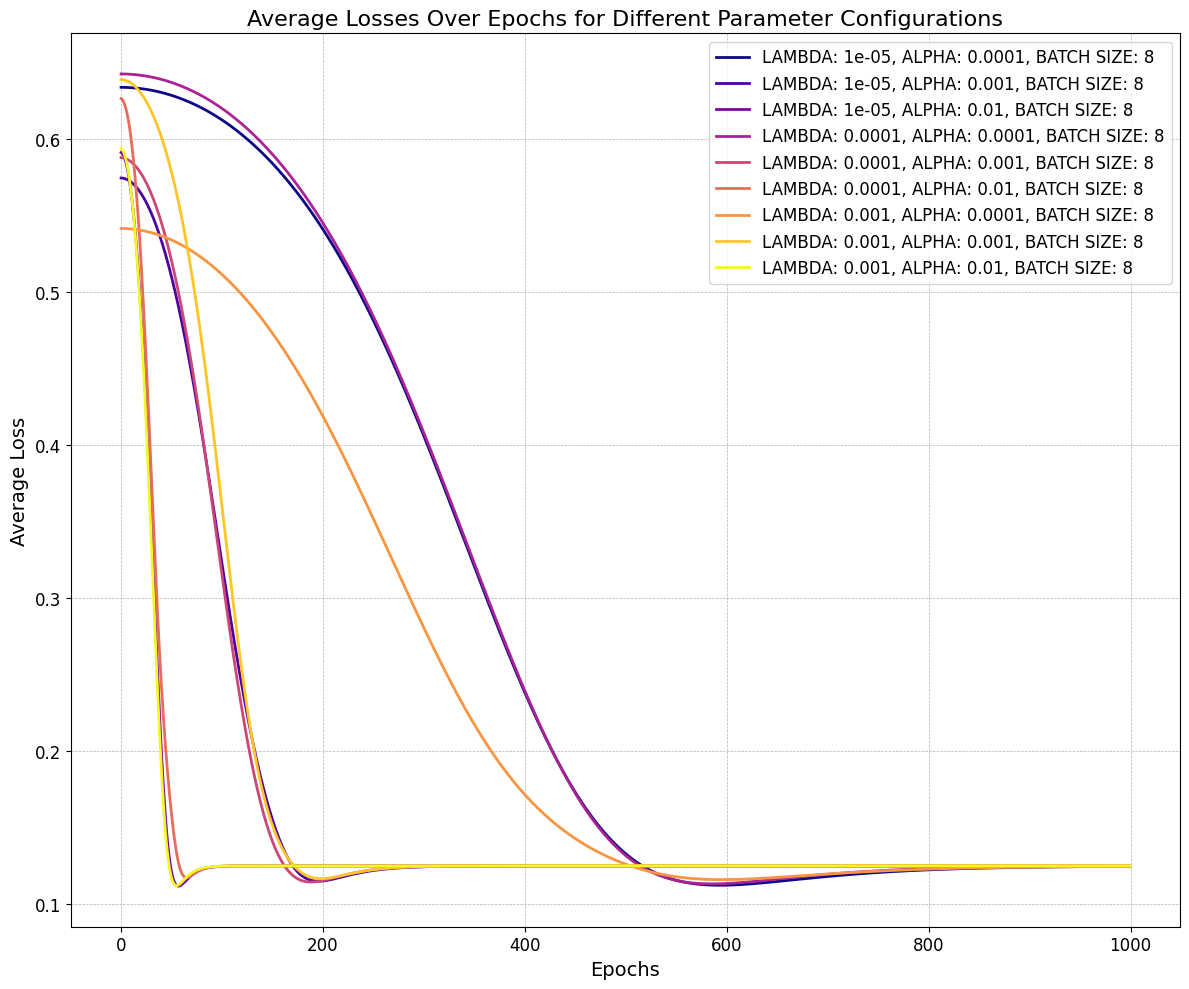

In [15]:
import numpy as np
import matplotlib.pyplot as plt

lambda_values = [0.00001, 0.0001, 0.001]
alpha_values = [0.0001, 0.001, 0.01]
b_size = [8]
num_configs = len(lambda_values) * len(alpha_values)
losses = dict()
for b in b_size:
    for lambd in lambda_values:
        for alpha in alpha_values:
            nn = NeuralNetwork(alpha=alpha, lambd=lambd)
            nn.init_weights()
            nn.train(data, batch_size=b)
            losses[(lambd, alpha, b)] = nn

plt.figure(figsize=(12, 10))
colors = plt.cm.plasma(np.linspace(0, 1, num_configs))  
i = 0

for lambd in lambda_values:
    for alpha in alpha_values:
        for b in b_size:
            if b == 8:
                line_style = '-'  
            net: NeuralNetwork = losses[(lambd, alpha, b)] 
            plt.plot(net.average_losses, color=colors[i], linestyle=line_style, linewidth=2, label=f'LAMBDA: {lambd}, ALPHA: {alpha}, BATCH SIZE: {b}')
        i += 1

plt.title('Average Losses Over Epochs for Different Parameter Configurations', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Average Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  
plt.show()



In [ ]:
lambda_values = [ 0.001]
alpha_values = [0.01]
b_size = [1, 3, 8]
num_configs = len(lambda_values) * len(alpha_values)
losses = dict()
for b in b_size:
    for lambd in lambda_values:
        for alpha in alpha_values:
            nn = NeuralNetwork(alpha=alpha, lambd=lambd)
            nn.init_weights()
            nn.train(data, batch_size=b)
            losses[(lambd, alpha, b)] = nn

plt.figure(figsize=(12, 10))
colors = plt.cm.plasma(np.linspace(0, 1, num_configs))  
i = 0

for lambd in lambda_values:
    for alpha in alpha_values:
        for b in b_size:
            if b == 1:
                line_style = '-'  # Solid line for batch size 1
            elif b == 8:
                line_style = '--'  # Dashed line for batch size 8
            else:
                line_style = ':' 
            net: NeuralNetwork = losses[(lambd, alpha, b)] 
            plt.plot(net.average_losses, color=colors[i], linestyle=line_style, linewidth=2, label=f'LAMBDA: {lambd}, ALPHA: {alpha}, BATCH SIZE: {b}')
        i += 1

plt.title('Average Losses Over Epochs for Different Parameter Configurations', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Average Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  
plt.show()


Based on the trials conducted, the neural network exhibits faster convergence with the parameter configurations of 𝜆=0.001, 𝛼=0.01α=0.01, and batch_size=8. This suggests that these specific values for the regularization parameter, learning rate, and batch size are particularly effective in facilitating the training process. As a result, the network is able to achieve lower average losses more rapidly compared to other configurations tested.


Moreover, it is noteworthy that the data being orthogonal to each other contributes to significant variability in the training losses, especially when employing a batch size of one. In this scenario, the model experiences highly fluctuating and inconsistent loss values, which can hinder its ability to learn effectively. Each individual sample directs the optimization in different directions, resulting in a noisy training process. In contrast, utilizing a mini-batch size, such as 8, mitigates this issue by providing more stable updates and enabling the model to generalize better from the data, ultimately leading to improved convergence and performance.

**Optuna optimization**

[I 2024-11-03 23:22:08,404] A new study created in memory with name: no-name-d7b6d4f8-2fd1-414a-a32e-fa9429b39177
C:\Users\Aurora Pia Ghiardell\AppData\Local\Temp\ipykernel_20424\2596270355.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambd = trial.suggest_loguniform('lambda', 1e-5, 1e-1)
C:\Users\Aurora Pia Ghiardell\AppData\Local\Temp\ipykernel_20424\2596270355.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-2)
[I 2024-11-03 23:22:08,571] Trial 0 finished with value: 0.17063905455329836 and parameters: {'lambda': 0.02931546270096464, 'alpha': 0.0001350549751814683, 'batch_size': 1}. Best is trial 0 with val

Epoch 1/1000, Loss: 0.6032738147088645
Epoch 2/1000, Loss: 0.5697328526509507
Epoch 3/1000, Loss: 0.6448725015342403
Epoch 4/1000, Loss: 0.6050738165124037
Epoch 5/1000, Loss: 0.5697239423501193
Epoch 6/1000, Loss: 0.5697189681217552
Epoch 7/1000, Loss: 0.593730373654364
Epoch 8/1000, Loss: 0.5937237877047405
Epoch 9/1000, Loss: 0.6050461509751845
Epoch 10/1000, Loss: 0.6032336013069667
Epoch 11/1000, Loss: 0.5935056791705677
Epoch 12/1000, Loss: 0.6050183873071153
Epoch 13/1000, Loss: 0.6032046290343447
Epoch 14/1000, Loss: 0.6049952838758135
Epoch 15/1000, Loss: 0.603180824435557
Epoch 16/1000, Loss: 0.5696160502299858
Epoch 17/1000, Loss: 0.603153242573871
Epoch 18/1000, Loss: 0.5934247329349907
Epoch 19/1000, Loss: 0.6447446966828708
Epoch 20/1000, Loss: 0.593394162844618
Epoch 21/1000, Loss: 0.6149267813916857
Epoch 22/1000, Loss: 0.5695097646759202
Epoch 23/1000, Loss: 0.6446838391019869
Epoch 24/1000, Loss: 0.603030594892269
Epoch 25/1000, Loss: 0.6048059999704342
Epoch 26/1000,

[I 2024-11-03 23:22:08,901] Trial 1 finished with value: 0.125 and parameters: {'lambda': 0.059777559818513445, 'alpha': 0.007316986531676869, 'batch_size': 3}. Best is trial 1 with value: 0.125.
[I 2024-11-03 23:22:09,054] Trial 2 finished with value: 0.12488449474048428 and parameters: {'lambda': 0.015766844372779695, 'alpha': 0.0008211321244430484, 'batch_size': 1}. Best is trial 2 with value: 0.12488449474048428.


Epoch 302/1000, Loss: 0.1249996265803902
Epoch 303/1000, Loss: 0.1249995440101077
Epoch 304/1000, Loss: 0.12499954573103637
Epoch 305/1000, Loss: 0.12499961169736429
Epoch 306/1000, Loss: 0.1249995238143784
Epoch 307/1000, Loss: 0.12499973155427387
Epoch 308/1000, Loss: 0.12499963004052426
Epoch 309/1000, Loss: 0.124999595242479
Epoch 310/1000, Loss: 0.12499968696546189
Epoch 311/1000, Loss: 0.12499973951848137
Epoch 312/1000, Loss: 0.12499974660227071
Epoch 313/1000, Loss: 0.12499969205007312
Epoch 314/1000, Loss: 0.1249997866548747
Epoch 315/1000, Loss: 0.12499988260077122
Epoch 316/1000, Loss: 0.12499980257030456
Epoch 317/1000, Loss: 0.12499976603048081
Epoch 318/1000, Loss: 0.1249999017258497
Epoch 319/1000, Loss: 0.12499983260205956
Epoch 320/1000, Loss: 0.1249997901382413
Epoch 321/1000, Loss: 0.1249998341260115
Epoch 322/1000, Loss: 0.12499987599381342
Epoch 323/1000, Loss: 0.12499982117978649
Epoch 324/1000, Loss: 0.12499987280123982
Epoch 325/1000, Loss: 0.1249998796327934
Ep

[I 2024-11-03 23:22:09,377] Trial 3 finished with value: 0.12499999999937983 and parameters: {'lambda': 0.0014611256807307892, 'alpha': 0.001799014102043603, 'batch_size': 3}. Best is trial 2 with value: 0.12488449474048428.


Epoch 393/1000, Loss: 0.1248864885741613
Epoch 394/1000, Loss: 0.12491958007107463
Epoch 395/1000, Loss: 0.12490711188856472
Epoch 396/1000, Loss: 0.12462388474865416
Epoch 397/1000, Loss: 0.12461946285281987
Epoch 398/1000, Loss: 0.12464745651483973
Epoch 399/1000, Loss: 0.12491226602768629
Epoch 400/1000, Loss: 0.1246661409900165
Epoch 401/1000, Loss: 0.12493234282718065
Epoch 402/1000, Loss: 0.12468916285899316
Epoch 403/1000, Loss: 0.12469835930555088
Epoch 404/1000, Loss: 0.12493830197456383
Epoch 405/1000, Loss: 0.12472921306057161
Epoch 406/1000, Loss: 0.12472770465841669
Epoch 407/1000, Loss: 0.12473751654217874
Epoch 408/1000, Loss: 0.1249381147678809
Epoch 409/1000, Loss: 0.12476033477641069
Epoch 410/1000, Loss: 0.12493867268125415
Epoch 411/1000, Loss: 0.1249441946295264
Epoch 412/1000, Loss: 0.12494858274442304
Epoch 413/1000, Loss: 0.12494415979714883
Epoch 414/1000, Loss: 0.12494835690296834
Epoch 415/1000, Loss: 0.12494763980851331
Epoch 416/1000, Loss: 0.12494638938098

[I 2024-11-03 23:22:09,534] Trial 4 finished with value: 0.12499999999413963 and parameters: {'lambda': 0.00016782339736488437, 'alpha': 0.0064176467274750385, 'batch_size': 1}. Best is trial 2 with value: 0.12488449474048428.


Epoch 111/1000, Loss: 0.3300742849930687
Epoch 112/1000, Loss: 0.3530059358487469
Epoch 113/1000, Loss: 0.32373572235562054
Epoch 114/1000, Loss: 0.31897120303050397
Epoch 115/1000, Loss: 0.3390712423656498
Epoch 116/1000, Loss: 0.3344001187631571
Epoch 117/1000, Loss: 0.30181027511039116
Epoch 118/1000, Loss: 0.2971177332822823
Epoch 119/1000, Loss: 0.29241922450188806
Epoch 120/1000, Loss: 0.29302091428562127
Epoch 121/1000, Loss: 0.26913214329350155
Epoch 122/1000, Loss: 0.3064272828648643
Epoch 123/1000, Loss: 0.274338494615238
Epoch 124/1000, Loss: 0.21454235444788983
Epoch 125/1000, Loss: 0.26552927195639253
Epoch 126/1000, Loss: 0.24588407847641008
Epoch 127/1000, Loss: 0.26437037288018195
Epoch 128/1000, Loss: 0.19535011701229738
Epoch 129/1000, Loss: 0.1906816174135024
Epoch 130/1000, Loss: 0.25206452360038856
Epoch 131/1000, Loss: 0.2659744408896828
Epoch 132/1000, Loss: 0.2616584178482936
Epoch 133/1000, Loss: 0.21568869532641194
Epoch 134/1000, Loss: 0.2355227002125836
Epoc

[I 2024-11-03 23:22:10,255] Trial 5 finished with value: 0.1249999999999349 and parameters: {'lambda': 0.002605592461932117, 'alpha': 0.001096742123440143, 'batch_size': 8}. Best is trial 2 with value: 0.12488449474048428.
[I 2024-11-03 23:22:10,419] Trial 6 finished with value: 0.12499999999996858 and parameters: {'lambda': 0.0008779858113722076, 'alpha': 0.006482356181845164, 'batch_size': 1}. Best is trial 2 with value: 0.12488449474048428.


Epoch 954/1000, Loss: 0.12499999999974727
Epoch 955/1000, Loss: 0.12499999999975461
Epoch 956/1000, Loss: 0.12499999999976177
Epoch 957/1000, Loss: 0.12499999999976871
Epoch 958/1000, Loss: 0.12499999999977543
Epoch 959/1000, Loss: 0.12499999999978198
Epoch 960/1000, Loss: 0.12499999999978831
Epoch 961/1000, Loss: 0.12499999999979447
Epoch 962/1000, Loss: 0.12499999999980044
Epoch 963/1000, Loss: 0.12499999999980627
Epoch 964/1000, Loss: 0.12499999999981189
Epoch 965/1000, Loss: 0.12499999999981737
Epoch 966/1000, Loss: 0.12499999999982267
Epoch 967/1000, Loss: 0.12499999999982783
Epoch 968/1000, Loss: 0.12499999999983284
Epoch 969/1000, Loss: 0.12499999999983769
Epoch 970/1000, Loss: 0.1249999999998424
Epoch 971/1000, Loss: 0.124999999999847
Epoch 972/1000, Loss: 0.12499999999985145
Epoch 973/1000, Loss: 0.12499999999985575
Epoch 974/1000, Loss: 0.12499999999985996
Epoch 975/1000, Loss: 0.124999999999864
Epoch 976/1000, Loss: 0.12499999999986797
Epoch 977/1000, Loss: 0.124999999999871

[I 2024-11-03 23:22:10,577] Trial 7 finished with value: 0.11718072145893146 and parameters: {'lambda': 0.000135710062765864, 'alpha': 0.00032442147757948554, 'batch_size': 1}. Best is trial 7 with value: 0.11718072145893146.


Epoch 96/1000, Loss: 0.5976092381275018
Epoch 97/1000, Loss: 0.6156350796285155
Epoch 98/1000, Loss: 0.6184312295082888
Epoch 99/1000, Loss: 0.5970131300749946
Epoch 100/1000, Loss: 0.6001305934252674
Epoch 101/1000, Loss: 0.6252015421726048
Epoch 102/1000, Loss: 0.6146023836015642
Epoch 103/1000, Loss: 0.6022738816665615
Epoch 104/1000, Loss: 0.6172529195385563
Epoch 105/1000, Loss: 0.6245009917553161
Epoch 106/1000, Loss: 0.6397132958557336
Epoch 107/1000, Loss: 0.5986528685851752
Epoch 108/1000, Loss: 0.6164262900912851
Epoch 109/1000, Loss: 0.6392353533542053
Epoch 110/1000, Loss: 0.6390060763020933
Epoch 111/1000, Loss: 0.6388661240997204
Epoch 112/1000, Loss: 0.6123726197558879
Epoch 113/1000, Loss: 0.63848899532017
Epoch 114/1000, Loss: 0.5937407139879887
Epoch 115/1000, Loss: 0.5997784173422686
Epoch 116/1000, Loss: 0.6114204084978161
Epoch 117/1000, Loss: 0.5930286553364179
Epoch 118/1000, Loss: 0.6142192964465278
Epoch 119/1000, Loss: 0.637310347907428
Epoch 120/1000, Loss: 0

[I 2024-11-03 23:22:11,299] Trial 8 finished with value: 0.12487768673380092 and parameters: {'lambda': 5.668348454471778e-05, 'alpha': 0.00010210974579960318, 'batch_size': 8}. Best is trial 7 with value: 0.11718072145893146.


Epoch 814/1000, Loss: 0.1239198417886617
Epoch 815/1000, Loss: 0.12393232481071381
Epoch 816/1000, Loss: 0.12394466653931532
Epoch 817/1000, Loss: 0.1239568684864404
Epoch 818/1000, Loss: 0.12396893215024236
Epoch 819/1000, Loss: 0.12398085901511575
Epoch 820/1000, Loss: 0.12399265055175955
Epoch 821/1000, Loss: 0.1240043082172425
Epoch 822/1000, Loss: 0.12401583345506968
Epoch 823/1000, Loss: 0.12402722769525086
Epoch 824/1000, Loss: 0.12403849235437023
Epoch 825/1000, Loss: 0.12404962883565739
Epoch 826/1000, Loss: 0.12406063852905978
Epoch 827/1000, Loss: 0.12407152281131639
Epoch 828/1000, Loss: 0.12408228304603242
Epoch 829/1000, Loss: 0.12409292058375528
Epoch 830/1000, Loss: 0.1241034367620516
Epoch 831/1000, Loss: 0.12411383290558511
Epoch 832/1000, Loss: 0.12412411032619568
Epoch 833/1000, Loss: 0.12413427032297897
Epoch 834/1000, Loss: 0.12414431418236703
Epoch 835/1000, Loss: 0.12415424317820994
Epoch 836/1000, Loss: 0.12416405857185761
Epoch 837/1000, Loss: 0.12417376161224

[I 2024-11-03 23:22:11,642] Trial 9 finished with value: 0.12361377358249637 and parameters: {'lambda': 1.3574634452841893e-05, 'alpha': 0.00019456559251554073, 'batch_size': 3}. Best is trial 7 with value: 0.11718072145893146.


Epoch 823/1000, Loss: 0.11888623050342961
Epoch 824/1000, Loss: 0.11923450707995474
Epoch 825/1000, Loss: 0.11921442310477164
Epoch 826/1000, Loss: 0.1197508970912295
Epoch 827/1000, Loss: 0.11979001821458057
Epoch 828/1000, Loss: 0.1184650889648462
Epoch 829/1000, Loss: 0.12007181854691595
Epoch 830/1000, Loss: 0.11971597444244371
Epoch 831/1000, Loss: 0.12004108479134783
Epoch 832/1000, Loss: 0.11983821508894467
Epoch 833/1000, Loss: 0.11987778782281584
Epoch 834/1000, Loss: 0.12059513576586718
Epoch 835/1000, Loss: 0.11900496686050428
Epoch 836/1000, Loss: 0.11921813660974175
Epoch 837/1000, Loss: 0.11998448994336675
Epoch 838/1000, Loss: 0.120442950118057
Epoch 839/1000, Loss: 0.12047858258194837
Epoch 840/1000, Loss: 0.11989813390712982
Epoch 841/1000, Loss: 0.12020564466614174
Epoch 842/1000, Loss: 0.12022246372412922
Epoch 843/1000, Loss: 0.12056183054548648
Epoch 844/1000, Loss: 0.11970964168025892
Epoch 845/1000, Loss: 0.1205725060176414
Epoch 846/1000, Loss: 0.120386983380365

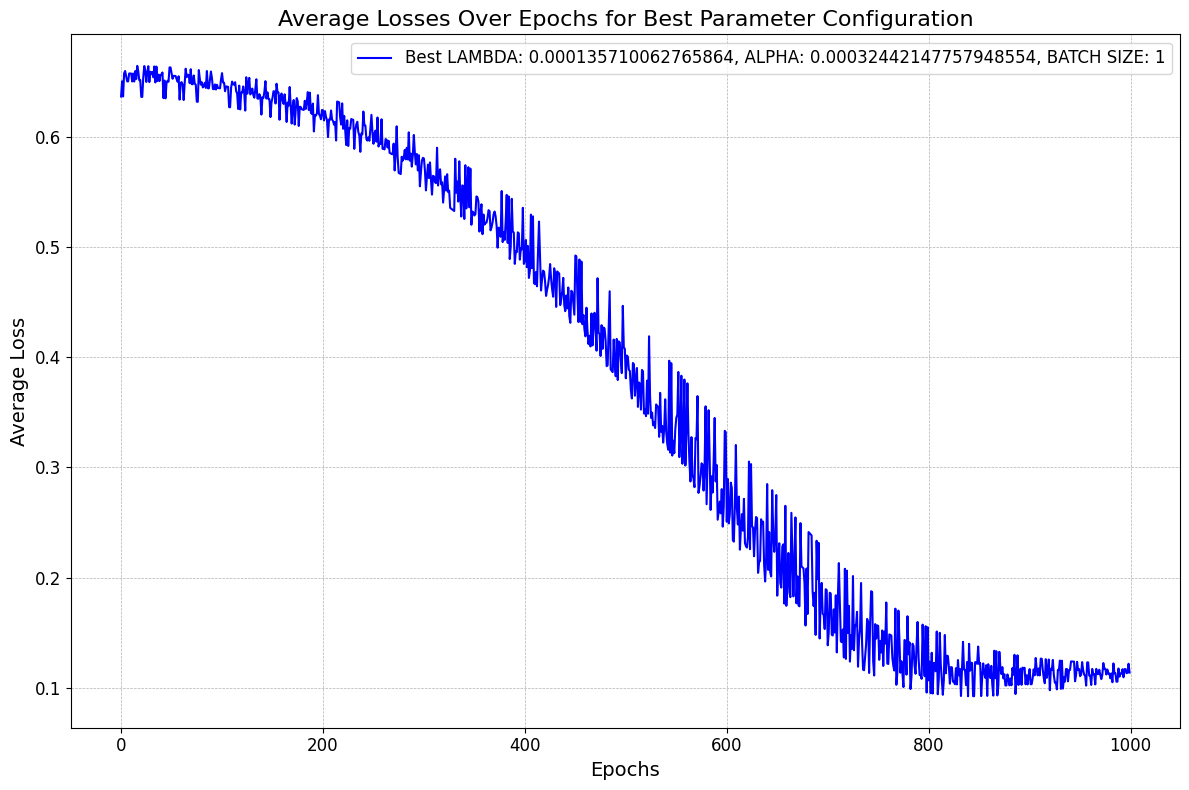

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import optuna


def objective(trial):
    lambd = trial.suggest_loguniform('lambda', 1e-5, 1e-1)
    alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-2)
    batch_size = trial.suggest_categorical('batch_size', [1, 3, 8])

    nn = NeuralNetwork(alpha=alpha, lambd=lambd)
    nn.init_weights()
    nn.train(data, batch_size=batch_size)  

    return nn.average_losses[-1] 

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10) 

print(f"Best parameters: {study.best_params}")
print(f"Best loss: {study.best_value}")

best_params = study.best_params
best_nn = NeuralNetwork(alpha=best_params['alpha'], lambd=best_params['lambda'])
best_nn.init_weights()
best_nn.train(data, batch_size=best_params['batch_size'])

plt.figure(figsize=(12, 8))
plt.plot(best_nn.average_losses, color='blue', label=f'Best LAMBDA: {best_params["lambda"]}, ALPHA: {best_params["alpha"]}, BATCH SIZE: {best_params["batch_size"]}')
plt.title('Average Losses Over Epochs for Best Parameter Configuration', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Average Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)

plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Weights and Activation Interpretation

Layer 1 - Min weight: 0.012478914414036634, Max weight: 0.9609520059719335


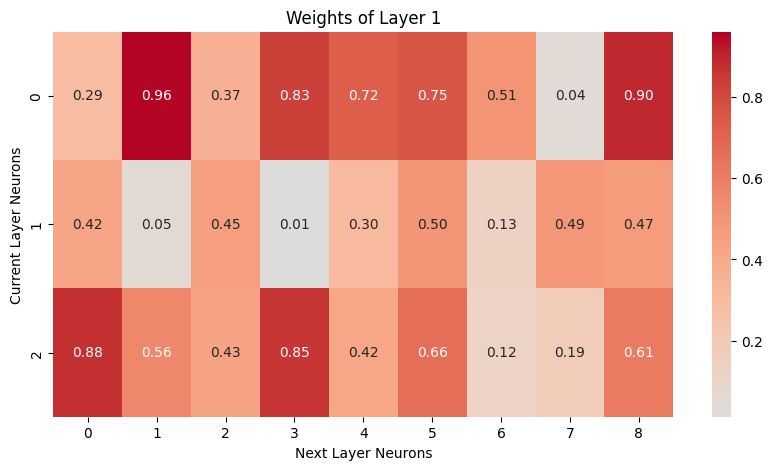

Layer 2 - Min weight: -1.5301271519062563, Max weight: -0.3260036287827986


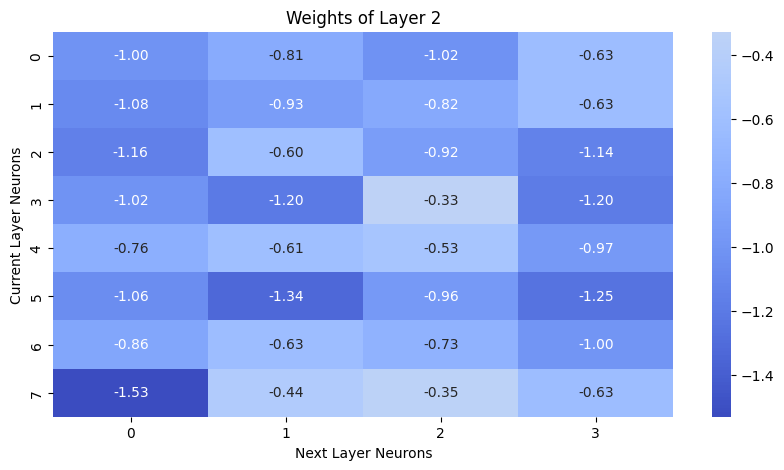

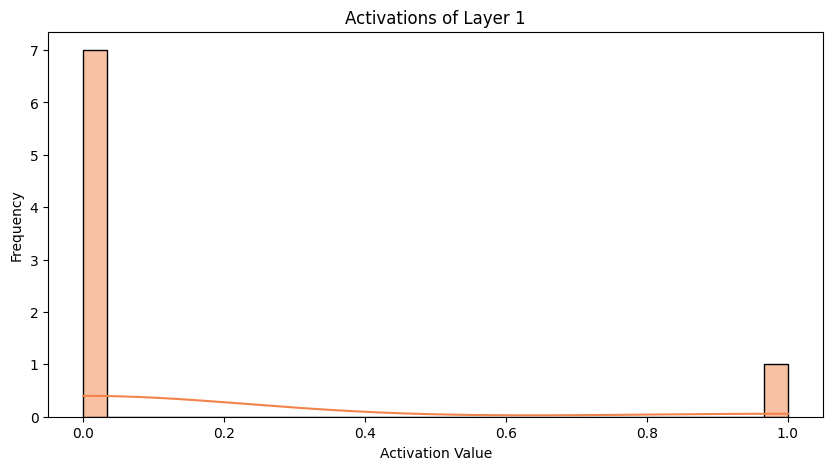

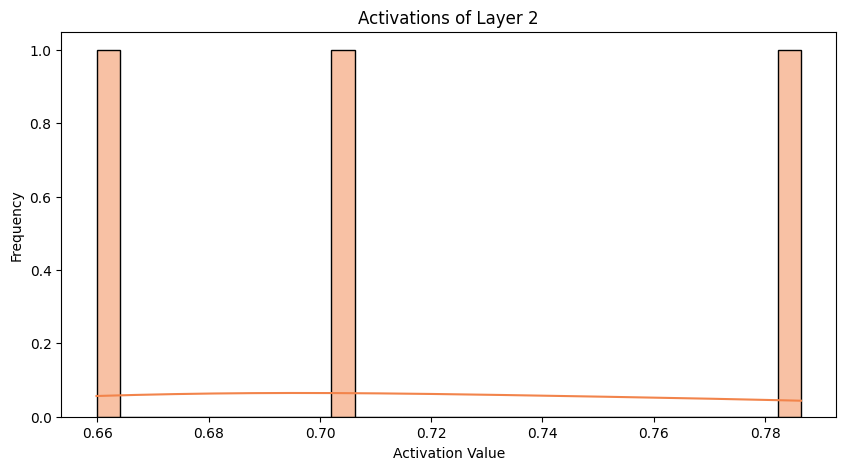

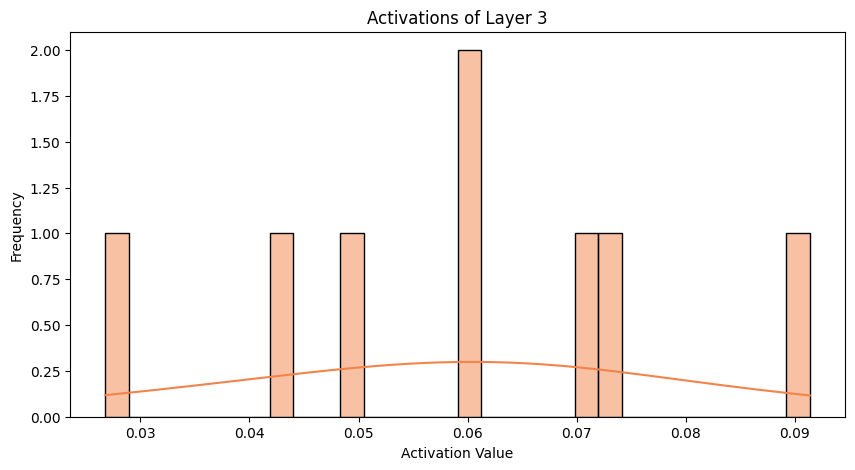

In [12]:
import seaborn as sns

weights = best_nn.weights
activations = best_nn.activations

def plot_weights(weights):
    for i, weight_matrix in enumerate(weights):
        plt.figure(figsize=(10, 5))

        min_val, max_val = weight_matrix.min(), weight_matrix.max()
        print(f"Layer {i+1} - Min weight: {min_val}, Max weight: {max_val}")

        vmin, vmax = (min_val, max_val) if min_val != max_val else (-1, 1)

        sns.heatmap(
            weight_matrix,
            cmap="coolwarm",
            annot=True,
            fmt=".2f",
            center=0,
            vmin=vmin,
            vmax=vmax,
        )
        plt.title(f"Weights of Layer {i+1}")
        plt.xlabel("Next Layer Neurons")
        plt.ylabel("Current Layer Neurons")
        plt.show()


plot_weights(weights)


def plot_activations(activations):
    for i, activation in enumerate(activations):
        plt.figure(figsize=(10, 5))
        sns.histplot(
            activation,
            bins=30,
            kde=True,
            color=sns.color_palette("plasma", as_cmap=True)(0.7),
        )
        plt.title(f"Activations of Layer {i+1}")
        plt.xlabel("Activation Value")
        plt.ylabel("Frequency")
        plt.show()


plot_activations(activations)


